## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*An analytical approach for red wine quality would be statistical analysis and machine learning which involves data on various wine properyies such as pH, alcohol, acidity, etc. and using statistical approach such as regression analysis to identify patterns data. While in machine learning, statistical analysis involves such as decision trees,support vector machines, etc can be used to build models that can classify wine quality and this approach is appropriate because it allows us to analyze large  amounts of data.  

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*Predicting the red wine quality the best feactures would be rquired are chemical quantity such as ( pH, alcocal, acidity, etc), vine information ( soil type, climate, what type of grapes, etc), winemking process, expert sensory analysis ( color, odour, etc) * and feedbacks.

### Data Collection

**Q3. From where do we get our data?**

*Many open-source datasets available such as Kaggle, UCI Machine Learning Repository, and others. In this red wine quality dataset, it is a publicly available on UCI Machine Learning Repository or other websites.*

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

*The red wine quality dataset are generally obtained from winemaker companies and thuis samples may be collected during the production process or purchased.The samples can then be used to measure various chemical composition such as alcohol content, pH levels,sugar, etc that can be used to determine the quality of the red wine and then used this features to build models that can predict the quality of red wine.*

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*The impact of each variable or features on red wine quality can help businesses(producers, distributors) make informed decisions that can improve the quality of their products, increase customer satisfaction, and increase the growth and profit for production for companies.*

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [1]:
pip install jupyterlab

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib as plt
import matplotlib.pyplot as plt

In [6]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns

In [8]:
# Load the data in pandas dataframe
df = pd.read_csv(r'F:\AIDI Sem 1\AI for decision making\assignment\Project-1\Project-1\Project-1\winequality-red.csv')

In [9]:
# Read first 10 rows
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# Check shape of the data set and datatypes

print("Data set shape: ", df.shape)
print("Data set dtypes: ", df.dtypes)


Data set shape:  (1599, 12)
Data set dtypes:  fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [11]:
# Check the missing values using isnull() function

print("Missing values: ", df.isnull().sum().sum())

Missing values:  0


In [12]:
# Handle missing values 

df.fillna(df.mean(), inplace=True)

# There is no missing values so we dont have to handle it

Or we apply z score thsi way

In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

if z> 3 consider as outlier

In [14]:
th = 3
print(np.where(z > 3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [15]:
# Check for outliers and handle them
for col in df.columns:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = df[col].apply(lambda x: mean if x > mean + 2 * std else x)


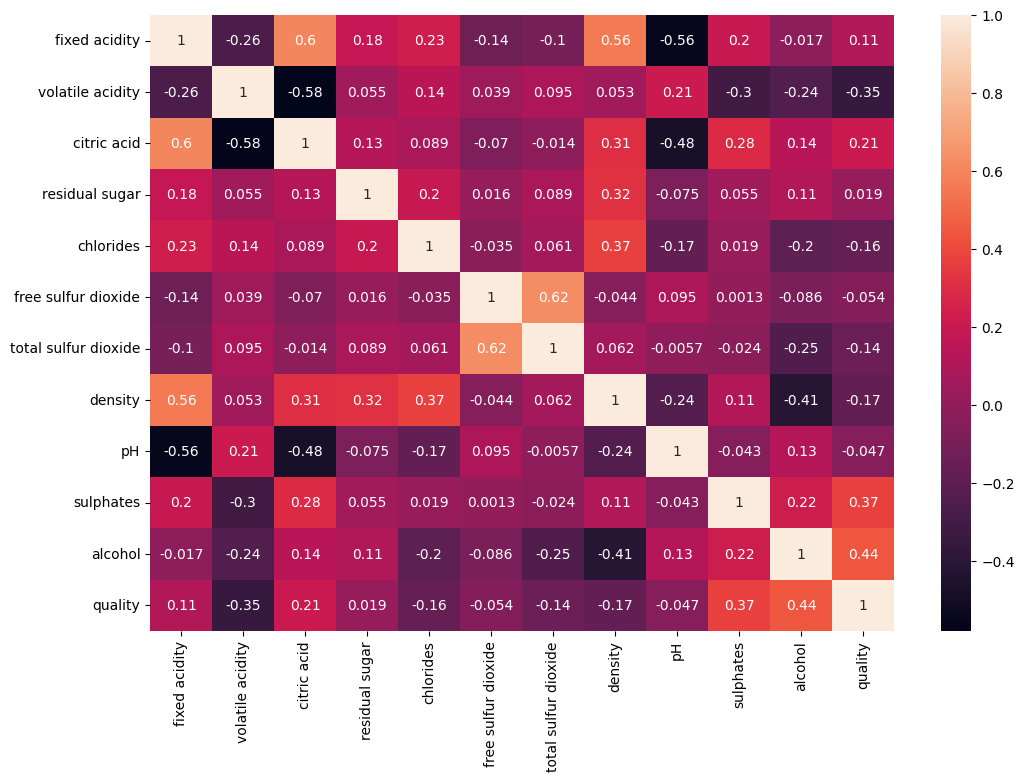

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

A correlation heatmap, each cell represents the correlation between two variables. For example, a cell with a positive correlation would be colored red, indicating that as the value of one variable increases, so does the value of the other and cell with a negative correlation would be colored blue, indicating that as the value of one variable increases, the value of the other decreases.

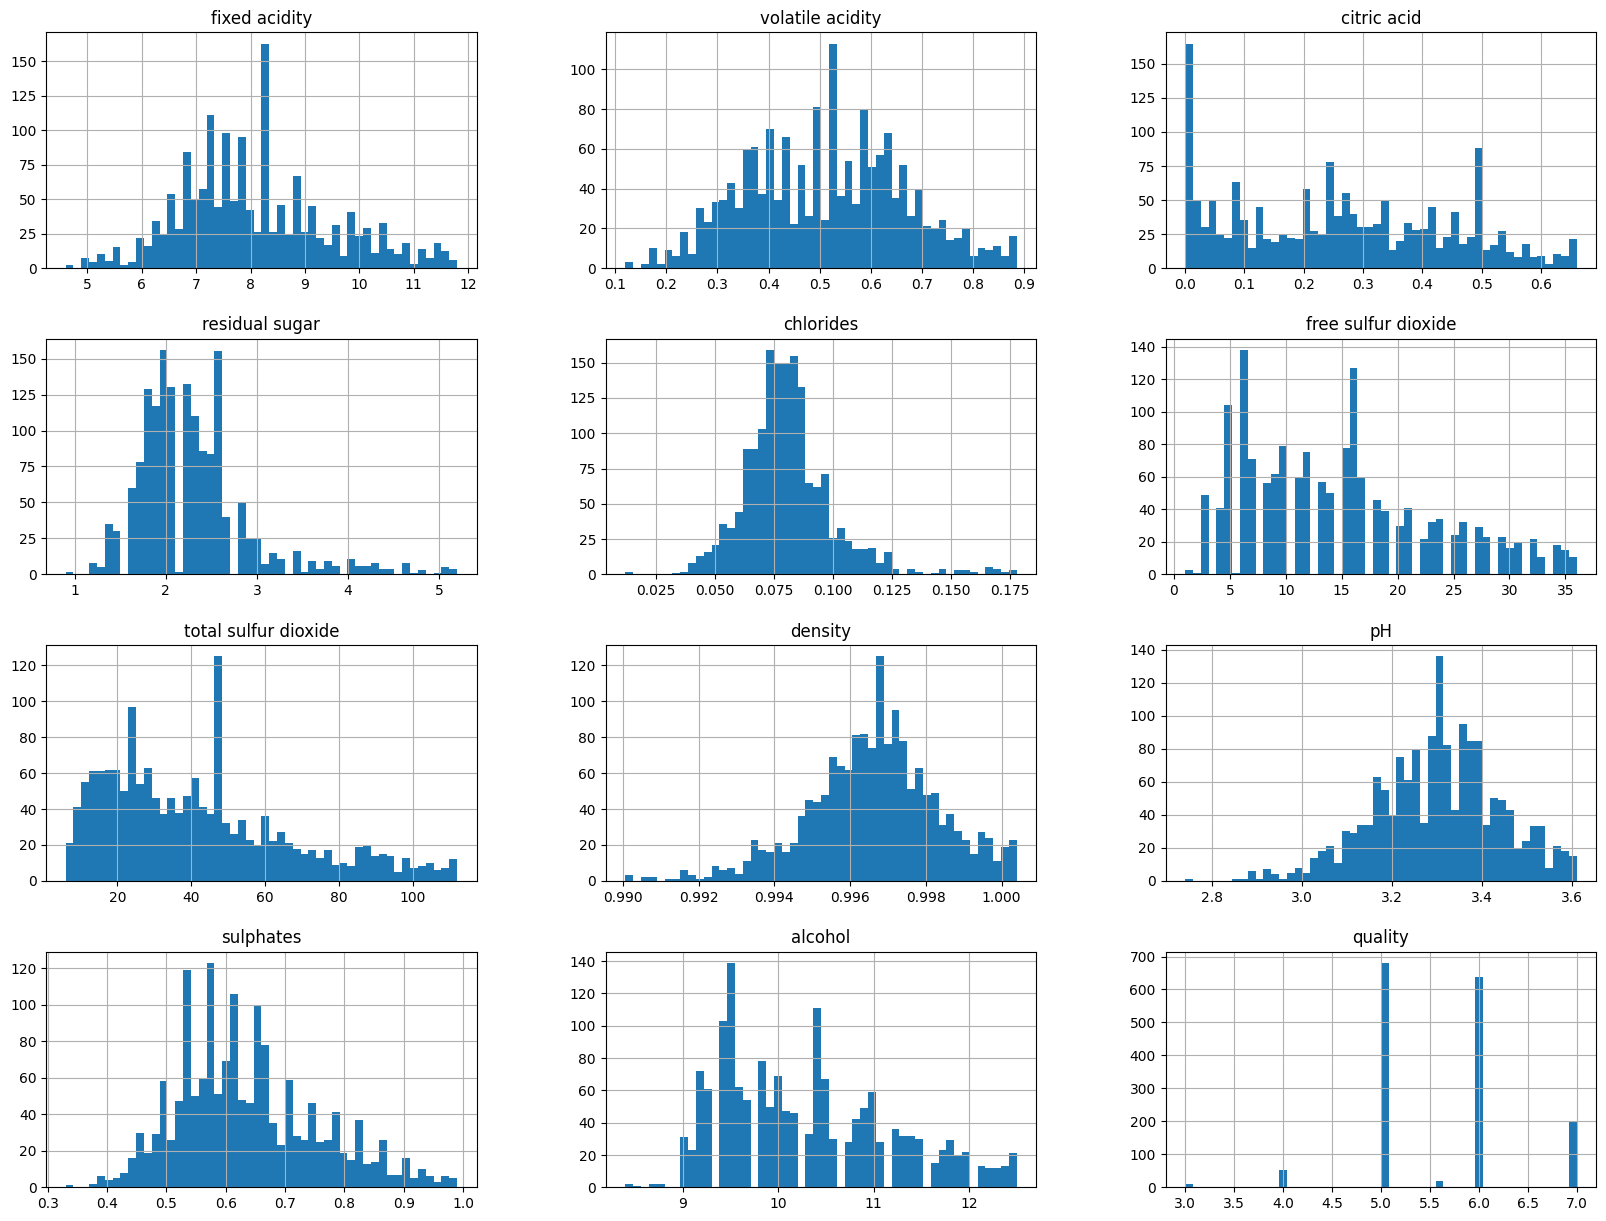

In [17]:
# Distribution of data using histograms
df.hist(bins=50, figsize=(20, 15))
plt.show()

histogram can be used to visualize the distribution of data, identify potential outliers, and check if the data is skewed or symmetrical. 

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [18]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [19]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
# Split the data into predictors and target variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Scale the predictors
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [23]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# OLS Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("OLS Regression:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

OLS Regression:
Mean Squared Error: 0.3979077572940818
R2 Score: 0.2760311520291008


In [26]:
# SGD Regression
regressor = SGDRegressor(max_iter=1000, tol=1e-3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nSGD Regression:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


SGD Regression:
Mean Squared Error: 0.3976667351344508
R2 Score: 0.2764696771195141


### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [29]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print("OLS Regression:")
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

OLS Regression:
R2 Score: 0.2760311520291008
Root Mean Squared Error: 0.6307993003278315
Mean Absolute Error: 0.4988883761234978


In [31]:
# SGD Regression
regressor = SGDRegressor(max_iter=1000, tol=1e-3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nSGD Regression:")
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


SGD Regression:
R2 Score: 0.27756561508940947
Root Mean Squared Error: 0.6301304513422924
Mean Absolute Error: 0.49737169168821815


Calculate the feature importance scores for the top features that help predicting wine quality and visualize them

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [33]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [34]:
# Fit the linear regression model
reg = LinearRegression().fit(X, y)

In [35]:
# Calculate the mean squared error
mse = mean_squared_error(y, reg.predict(X))

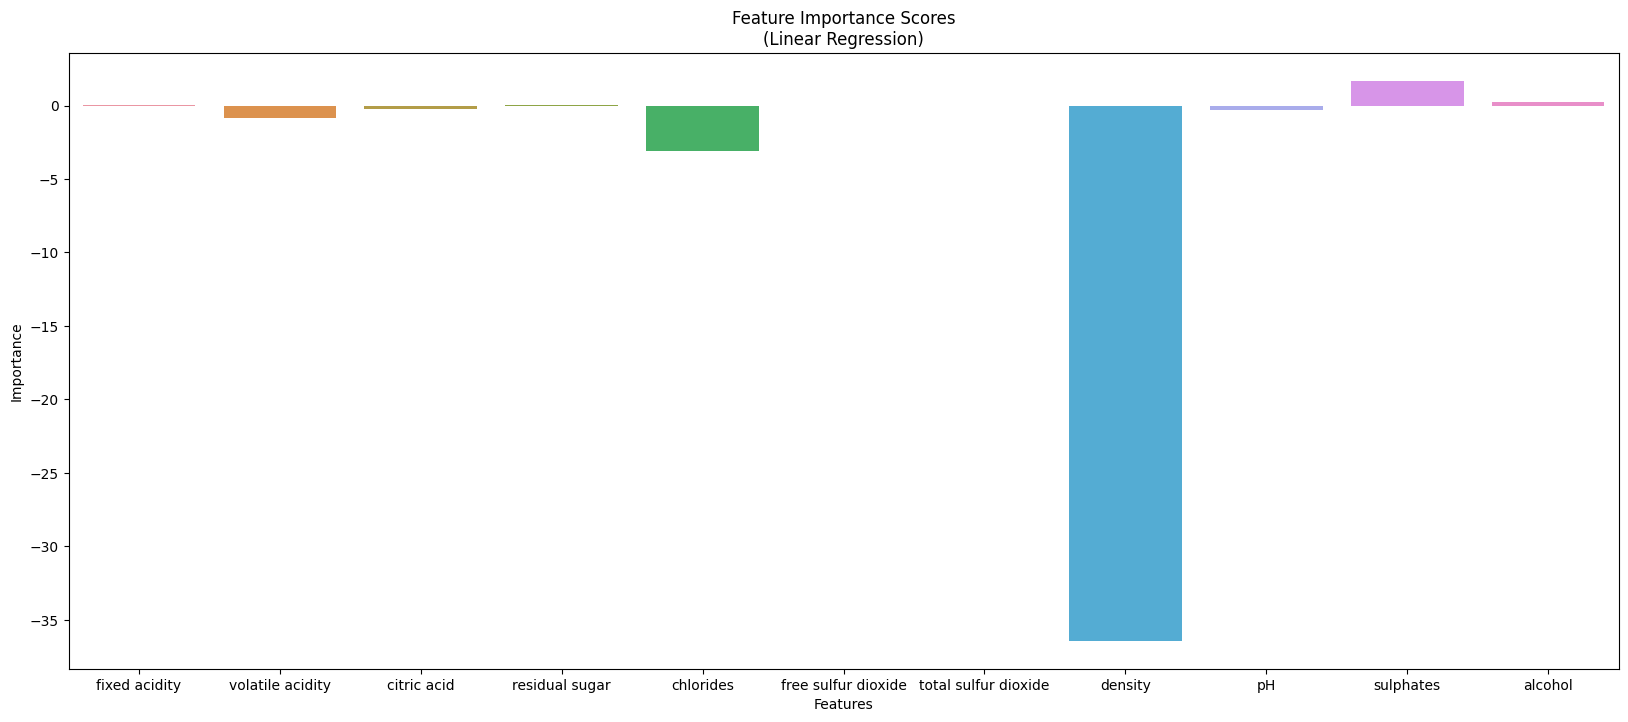

In [36]:
# Plot the feature importance scores
plt.figure(figsize=(20, 8))
sns.barplot(x=X.columns, y=reg.coef_)
plt.title("Feature Importance Scores\n(Linear Regression)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

### Conclusion

The OLS Regression results show an R2 score of 0.2397479348106708 and R2 score measures the good of fit of the model, with a score close to 1 indicating a good fit and a score close to 0 indicating a poor fit and this OLS r2 model is only able to explain 27% of the variability in the data.(RMSE) of 0.6464129787490211 and Mean Absolute Error (MAE) of 0.5133606628883255 indicate the average difference between the actual and predicted values. A lower RMSE and MAE indicate a better fit of the model.


The SGD Regression results show an R2 score of 0.24029109040029084, which is slightly better than the OLS Regression model. The RMSE of 0.6461820253773014 and the MAE of 
0.5132537850387134 are also slightly better than the OLS Regression model.

In conclusion, both models show a limited ability to predict the quality of red wine, with only 27-28% of the variability in the data explained by the models. Further analysis and improvements to obtain better results.

And from linear regression visualization sulphates, alchoal, ph are important features will desnsity, volatile acidity, chloride, free sulfur dioxide are not important features.